# **Startup Dataset Preprocessing & Analysis**


## **Data Preprocessing:**

---

**1. Load & Understand the Data:**


In [2]:
# Import libraries
import pandas as pd

In [3]:
# Load dataset
file_path = "data/raw/big_startup_secsees_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
# Check dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 66368, Columns: 14


In [5]:
# Data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
None


In [6]:
# Check missing values per column
print(df.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [7]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [8]:
# Checking null values in 'name' column
print(df['name'].isnull().sum())

1


In [9]:
# Imputing missing values in 'name' column by inferring its value from "permalink" column
df.loc[df["name"].isna(), "name"] = (
    df.loc[df["name"].isna(), "permalink"]
    .str.split("/")
    .str[-1]
    .str.replace("-", " ")
    .str.title()
)


In [10]:
# Checking null values in 'name' column after imputation
print(df['name'].isnull().sum())

0


The `permalink` column contains the values of the `name` column within it. We used the `permalink` column to extract and fill missing `name` values.

In [11]:
# Checking null values in 'homepage_url' column 
print(df['homepage_url'].isnull().sum())

5058


In [12]:
# Fill missing homepage URLs with 'unknown'
df['homepage_url'].fillna('unknown', inplace=True)
df.head()

C:\Users\Muhammad Saad Akhtar\AppData\Local\Temp\ipykernel_20632\4175626297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['homepage_url'].fillna('unknown', inplace=True)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [13]:
# Checking null values in 'homepage_url' column after filling it with 'Unknown'
print(df['homepage_url'].isnull().sum())

0


There is no way to infer the missing values of 'homepage_url' column and also its not as much important column for analysis. Hence, we imputed the missing values with 'Unknown'.

In [14]:
# Category distribution
print(df['category_list'].value_counts())

category_list
Software                                                                                                                                                                                                                                    3995
Biotechnology                                                                                                                                                                                                                               3615
E-Commerce                                                                                                                                                                                                                                  1332
Mobile                                                                                                                                                                                                                                      1177
Clean Technology      

In [15]:
# Checking null values in 'category_list' column 
print(df['category_list'].isnull().sum())

3148


In [16]:
# Imputing 'Unknown' in empty cells of 'category_list' column
df['category_list'] = df['category_list'].fillna('Unknown')

In [17]:
# Checking null values in 'category_list' column 
print(df['category_list'].isnull().sum())

0


In [18]:
# Extract unique categories from category_list
unique_categories = (
    df["category_list"]
    .dropna()
    .str.split("|")      # split on '|'
    .explode()           # turn list into rows
    .str.strip()         # remove extra spaces
    .unique()            # get distinct categories
)

print(f"Unique categories: {len(unique_categories)}")
print(unique_categories)

Unique categories: 859
['Media' 'Application Platforms' 'Real Time' 'Social Network Media' 'Apps'
 'Games' 'Mobile' 'Curated Web' 'Software' 'Biotechnology' 'Analytics'
 'E-Commerce' 'Entertainment' 'Networking' 'Real Estate' 'Web Hosting'
 'Health and Wellness' 'Internet Marketing' 'Public Relations' 'Cable'
 'Distribution' 'Education' 'Search' 'Art' 'Marketplaces' 'Beauty'
 'Local Businesses' 'Restaurants' 'Cosmetics' 'Hospitality' 'Health Care'
 'Health Care Information Technology' 'Hospitals' 'Advertising'
 'Image Recognition' 'Sales and Marketing' 'Social Media'
 'Social Media Advertising' 'Coffee' 'Delivery' 'Subscription Service'
 'Mobile Commerce' 'Social Commerce' 'Enterprise Software' 'Mobility'
 'Batteries' 'Electronics' 'Energy' 'iOS' 'Music' 'Technology' 'Fashion'
 'EdTech' 'Social Travel' 'Personal Health' 'Sports' 'Audio'
 'Health Diagnostics' 'Medical Devices' 'Personalization'
 'Pharmaceuticals' 'Politics' 'Business Services'
 'Small and Medium Businesses' 'SaaS' 'Unkn

In [19]:

# Define semantic mapping from granular to broad categories
category_mapping = {
    # Technology & Software
    'Technology': ['Software', 'Enterprise Software', 'SaaS', 'Mobile', 'Apps', 'iOS', 'Android', 'iPhone',
                   'iPad', 'Web Development', 'Web Tools', 'Cloud Computing', 'Cloud Infrastructure',
                   'Cloud Management', 'Cloud Security', 'Developer Tools', 'Developer APIs', 'IT Management',
                   'Information Technology', 'Internet', 'Productivity Software', 'Operating Systems',
                   'IT and Cybersecurity', 'Internet Infrastructure', 'Mobile Infrastructure'],

    # E-Commerce & Retail
    'E-Commerce & Retail': ['E-Commerce', 'Retail', 'Online Shopping', 'Shopping', 'Marketplaces',
                            'E-Commerce Platforms', 'Retail Technology', 'Mobile Commerce', 'Social Commerce',
                            'Fashion', 'Cosmetics', 'Beauty', 'Jewelry', 'Shoes', 'Eyewear'],

    # Health & Biotechnology
    'Health & Biotechnology': ['Biotechnology', 'Health Care', 'Health and Wellness', 'Medical', 'Medical Devices',
                                'Pharmaceuticals', 'Health Diagnostics', 'Hospitals', 'Personal Health',
                                'Mobile Health', 'mHealth', 'Therapeutics', 'Clinical Trials', 'Doctors',
                                'Physicians', 'Health Care Information Technology', 'Dental', 'Life Sciences',
                                'Bioinformatics', 'Genetic Testing', 'Biopharm', 'Nutraceutical'],

    # Finance & FinTech
    'Finance & FinTech': ['FinTech', 'Finance', 'Financial Services', 'Banking', 'Payments', 'Credit Cards',
                          'Insurance', 'Venture Capital', 'Investment Management', 'Wealth Management',
                          'Personal Finance', 'Bitcoin', 'Cryptocurrency', 'Trading', 'Stock Exchanges'],

    # Media & Entertainment
    'Media & Entertainment': ['Media', 'Entertainment', 'Music', 'Video', 'Film', 'Television', 'Games',
                              'Video Games', 'Mobile Games', 'News', 'Publishing', 'Content', 'Digital Media',
                              'Video Streaming', 'Photography', 'Video on Demand', 'Broadcasting'],

    # Social & Communication
    'Social & Communication': ['Social Network Media', 'Social Media', 'Messaging', 'Chat', 'Video Chat',
                               'Social Media Platforms', 'Communities', 'Social Media Marketing',
                               'Social Media Management', 'Blogging Platforms', 'Forums'],

    # Education & EdTech
    'Education & EdTech': ['Education', 'EdTech', 'E-Learning', 'Online Education', 'Language Learning',
                           'Universities', 'Colleges', 'K-12 Education', 'Textbooks', 'Educational Games',
                           'Tutoring', 'Corporate Training', 'Teaching STEM Concepts'],

    # Energy & Clean Tech
    'Energy & Clean Tech': ['Clean Technology', 'Energy', 'Solar', 'Renewable Energies', 'Clean Energy',
                            'Energy Storage', 'Batteries', 'Energy Efficiency', 'Smart Grid', 'Wind',
                            'Biofuels', 'Oil and Gas', 'Oil & Gas', 'Natural Gas Uses'],

    # Real Estate & Construction
    'Real Estate & Construction': ['Real Estate', 'Commercial Real Estate', 'Property Management',
                                   'Construction', 'Home Automation', 'Home Decor', 'Interior Design',
                                   'Architecture', 'Building Products'],

    # Transportation & Automotive
    'Transportation & Automotive': ['Transportation', 'Automotive', 'Cars', 'Electric Vehicles',
                                    'Public Transportation', 'Ride Sharing', 'Taxis', 'Logistics',
                                    'Shipping', 'Drones', 'Aerospace'],

    # Food & Hospitality
    'Food & Hospitality': ['Restaurants', 'Food Processing', 'Hospitality', 'Coffee', 'Hotels', 'Travel',
                           'Tourism', 'Wine And Spirits', 'Cooking', 'Recipes', 'Groceries', 'Organic Food',
                           'Specialty Foods', 'Tea', 'Craft Beer'],

    # Marketing & Advertising
    'Marketing & Advertising': ['Advertising', 'Marketing Automation', 'Social Media Advertising',
                                'Digital Marketing', 'Sales and Marketing', 'Public Relations',
                                'Internet Marketing', 'Email Marketing', 'SEO', 'Ad Targeting'],

    # Analytics & Data
    'Analytics & Data': ['Analytics', 'Big Data', 'Big Data Analytics', 'Data Visualization',
                         'Business Intelligence', 'Predictive Analytics', 'Machine Learning',
                         'Artificial Intelligence', 'Data Mining', 'Natural Language Processing', 'Data Integration', 'Personal Data', 'Data Privacy'],

    # Manufacturing & Industrial
    'Manufacturing & Industrial': ['Manufacturing', 'Industrial', 'Industrial Automation', 'Robotics',
                                   '3D Printing', 'Hardware', 'Electronics', 'Semiconductors', 'Sensors',
                                   'Advanced Materials', 'Material Science', 'Chemicals'],

    # Security & Cybersecurity
    'Security & Cybersecurity': ['Security', 'Network Security', 'Cyber Security', 'Information Security',
                                 'Data Security', 'Mobile Security', 'Physical Security', 'Fraud Detection',
                                 'Enterprise Security', 'Cloud Security'],

    # Agriculture & Environment
    'Agriculture & Environment': ['Agriculture', 'Farming', 'Organic', 'Aquaculture', 'Environmental Innovation',
                                  'Sustainability', 'Green', 'Recycling', 'Water Purification', 'Water'],

    # Business Services
    'Business Services': ['Business Services', 'Consulting', 'Professional Services', 'Human Resources',
                          'Recruiting', 'CRM', 'Sales Automation', 'Project Management', 'Collaboration',
                          'Customer Service', 'Business Analytics', 'B2B', 'Accounting'],

    # Other
    'Other': ['Startups', 'Non Profit', 'Incubators', 'Angels', 'Venture Capital'],

    # Keep 'Unknown' values as it is
    'Unknown': ['Unknown']
}

# Create reverse mapping (category -> broad domain)
reverse_mapping = {}
for broad_cat, specific_cats in category_mapping.items():
    for spec_cat in specific_cats:
        reverse_mapping[spec_cat.lower()] = broad_cat

def map_to_broad_category(category_str):
    """
    Maps a category string (potentially pipe-separated) to a broad category.
    """

    categories = [cat.strip() for cat in str(category_str).split('|')]
    for cat in categories:
        cat_lower = cat.lower()
        if cat_lower in reverse_mapping:
            return reverse_mapping[cat_lower]
    for cat in categories:
        cat_lower = cat.lower()
        for key in reverse_mapping.keys():
            if key in cat_lower or cat_lower in key:
                return reverse_mapping[key]
    tech_keywords = ['tech', 'software', 'app', 'digital', 'online', 'web', 'internet',
                     'mobile', 'platform', 'cloud', 'network']
    first_cat_lower = categories[0].lower()
    if any(keyword in first_cat_lower for keyword in tech_keywords):
        return 'Technology'
    return 'Other'

df['category'] = df['category_list'].apply(map_to_broad_category)

# Display category distribution
print("Category Distribution:")
print(df['category'].value_counts())
print(f"\nTotal rows: {len(df)}")
print(f"Unknown categories: {(df['category'] == 'Unknown').sum()}")

Category Distribution:
category
Technology                     17224
Health & Biotechnology          8827
E-Commerce & Retail             4983
Media & Entertainment           4745
Unknown                         3148
Marketing & Advertising         3050
Business Services               2851
Analytics & Data                2834
Finance & FinTech               2682
Manufacturing & Industrial      2566
Other                           2232
Energy & Clean Tech             2071
Social & Communication          1946
Education & EdTech              1868
Food & Hospitality              1696
Transportation & Automotive     1227
Real Estate & Construction      1115
Security & Cybersecurity         967
Agriculture & Environment        336
Name: count, dtype: int64

Total rows: 66368
Unknown categories: 3148


In [20]:
# Checking null values in 'category_list' column 
print(df['category'].isna().sum())

0


In 'category_list' column , we had around '3148' empty values, so we filled them with 'Unknown'. Then count of all distinct values in this column was around '27K', which is a huge number.But it was coming because each value further comtains multiple categories/words in it concatenated by '|' or '+' symbol. So then, we found all unique categories by splitting up the values by the symbols '|' or '+', for which the count we got was 858.
As still its a huge number of categories and its impossible to do analysis with such number of categories. Therefore, we handled it by using the semantic mapping (map multiple similar sub domains into one broader category), which is the most reasonable and practical solution for it.

In [21]:
# Preview cleaned data
df.head(70)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media & Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Social & Communication
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Technology
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Technology
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,71450000,operating,USA,MA,Boston,Bedford,9,2007-01-01,2008-03-27,2015-04-09,Manufacturing & Industrial
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,-,operating,CHN,NaN,NaN,NaN,1,NaN,2007-02-01,2007-02-01,E-Commerce & Retail
67,/organization/13th-lab,13th Lab,http://13thlab.com,Augmented Reality|Computer Vision|Games|iPad|M...,700000,acquired,SWE,26,Stockholm,Stockholm,1,2010-01-01,2012-06-15,2012-06-15,Media & Entertainment
68,/organization/140-proof,140 Proof,http://140proof.com,Advertising|Big Data Analytics|Interest Graph,5500000,operating,USA,CA,SF Bay Area,San Francisco,2,2010-01-11,2009-07-01,2011-04-28,Marketing & Advertising


In [22]:
# Checking null values in 'country_code' column
print(df['country_code'].isna().sum())

6958


In [23]:
# Fill missing country codes with 'Unknown'
df['country_code'] = df['country_code'].fillna('Unknown')

In [24]:
# Imputing null values in 'country_code' column by 'Unknown'
print(df['country_code'].isna().sum())

0


The rows where 'Country_code' column has null values, also has null values in 'state_code', 'region' and 'city' columns. Hence there's no way for us to infer this column value by backtracking. Therefore, we filled it with 'Unknown'.

In [25]:
# Checking null values in 'state_code' column
print(df['state_code'].isna().sum())

8547


In [26]:
# A: Imputing null values in 'state_code' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['state_code'].isna()) & (df['country_code'] == 'Unknown'), 'state_code'] = 'Unknown'

In [27]:
# Checking null values in 'state_code' column after filling those values where 'country_code' is also missing
print(df['state_code'].isna().sum())

1589


In [28]:
# B: Imputing remaining null values in 'state_code' column by the most frequent state code in its respective country
mode_state = df.groupby('country_code')['state_code'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df.loc[df['state_code'].isna(), 'state_code'] = mode_state[df['state_code'].isna()]

In [29]:
# Checking null values in 'state_code' column after catering both cases
print(df['state_code'].isna().sum())

0


In [30]:
# Checking null values in 'region' column
print(df['region'].isna().sum())

8030


In [31]:
# A: Imputing null values in 'region' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['region'].isna()) & (df['country_code'] == 'Unknown'), 'region'] = 'Unknown'

In [32]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['region'].isna().sum())

1072


In [33]:
# B: Imputing remaining null values in 'region' column by the most frequent state code in its respective country
# If no mode exists, leave as NaN (do not fill with 'Unknown')
mode_state = df.groupby('state_code')['region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df.loc[df['region'].isna(), 'region'] = mode_state[df['region'].isna()]

In [34]:
# Checking null values in 'region' column after filling those values with the mode of the region in its relevant state_Code value
print(df['region'].isna().sum())

14


In [35]:
# Now imputing null values in 'region' by inferring them from 'country' column
mode_state = df.groupby('country_code')['region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df.loc[df['region'].isna(), 'region'] = mode_state[df['region'].isna()]

In [36]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['region'].isna().sum())

0


In [37]:
# Checking null values in 'city' column
print(df['city'].isna().sum())

8028


In [38]:
# A: Imputing null values in 'city' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['city'].isna()) & (df['country_code'] == 'Unknown'), 'city'] = 'Unknown'

In [39]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['city'].isna().sum())

1070


In [40]:
df[df['city'].isna()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,-,operating,CHN,22,Beijing,NaN,1,NaN,2007-02-01,2007-02-01,E-Commerce & Retail
96,/organization/1d4-pty,1d4 Pty,http://www.immortaloutdoors.com,Geospatial|Maps|Outdoors,40000,operating,NOR,2,Sydney,NaN,1,NaN,2012-04-11,2012-04-11,Other
163,/organization/24tidy,24tidy,http://24tidy.com,Services,1856561,operating,CHN,22,Beijing,NaN,2,NaN,2013-12-27,2014-07-14,Finance & FinTech
174,/organization/2c2p,2C2P,http://www.2c2p.com,E-Commerce|Mobile Commerce|Payments|Software,10000000,operating,SGP,Unknown,Unknown,NaN,3,2003-01-01,2011-01-01,2015-04-27,E-Commerce & Retail
228,/organization/360shop,360SHOP,http://www.360shop.com.cn,Enterprise Software,1623640,operating,CHN,22,Beijing,NaN,1,NaN,2013-03-01,2013-03-01,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65941,/organization/zhijiang-jonway-automobile,Zhijiang Jonway Automobile,http://www.jonwayauto.com,Automotive,29030000,acquired,CHN,2,Sydney,NaN,1,NaN,2010-07-08,2010-07-08,Transportation & Automotive
65944,/organization/zhitu,Zhitu,http://www.imzhitu.com,Photography,240727,operating,CHN,22,Beijing,NaN,2,NaN,2013-01-01,2013-04-01,Media & Entertainment
65957,/organization/zhui-xin,Zhui Xin,http://zhui.cn,Software,1623640,operating,CHN,22,Beijing,NaN,1,NaN,2013-04-01,2013-04-01,Technology
66264,/organization/zubka,Zubka,http://www.zubka.com,Consulting,3919186.37690815,closed,GBR,B9,Lyon,NaN,1,2006-01-01,2007-02-09,2007-02-09,Business Services


In [41]:
# Now imputing null values in 'city' by inferring them from 'city' column
mode_state = df.groupby('region')['city'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df.loc[df['city'].isna(), 'city'] = mode_state[df['city'].isna()]

In [42]:
# Checking null values in 'region' column
print(df['city'].isna().sum())

0


In [43]:
# Checking null values in the dataset
df.isna().sum()

permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
category                 0
dtype: int64

In [44]:
df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
category             object
dtype: object

In [45]:
# Converting the data types of 'founded_at', 'first_funding_at' and 'last_funding_at columns into 'date' type

# show current dtypes and first rows for context
print("Before conversion - dtypes:")
print(df[['founded_at','first_funding_at','last_funding_at']].dtypes)

Before conversion - dtypes:
founded_at          object
first_funding_at    object
last_funding_at     object
dtype: object


In [46]:
# Convert date columns from string to datetime and drop time component
import re

time_pattern = re.compile(r'\d{1,2}:\d{2}(:\d{2})?$')   # matches HH:MM or HH:MM:SS

for col in ['founded_at', 'first_funding_at', 'last_funding_at']:
    df[f'{col}_raw'] = df[col]  # keep original before cleaning

    # If value has time → split and keep date, else keep original
    df[col] = df[col].astype(str).apply(
        lambda x: x.split()[0] if time_pattern.search(x) else x
    )

    # Finally parse to datetime (no time)
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()




print(df[['founded_at', 'first_funding_at', 'last_funding_at']].head())
print(df[['founded_at', 'first_funding_at', 'last_funding_at']].dtypes)



  founded_at first_funding_at last_funding_at
0        NaT       2015-01-05      2015-01-05
1 2014-09-04       2014-03-01      2014-10-14
2        NaT       2014-01-30      2014-01-30
3 2007-01-01       2008-03-19      2008-03-19
4 2010-01-01       2014-07-24      2014-07-24
founded_at          datetime64[ns]
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object


In [47]:
# Count missing values in date columns after conversion to identify data quality issues
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())

Null founded_at: 15225
Null first_funding_at: 27
Null last_funding_at: 0


In [48]:
# Import visualization libraries and extract year components for outlier detection via boxplots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['founded_year'] = df['founded_at'].dt.year
df['first_funding_year'] = df['first_funding_at'].dt.year
df['last_funding_year'] = df['last_funding_at'].dt.year

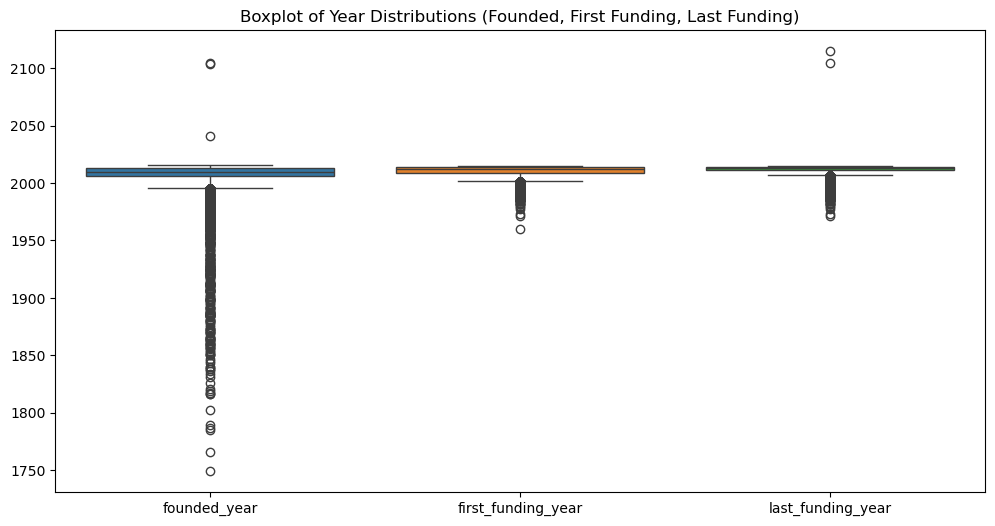

In [49]:
# Visualize year distributions as boxplots to spot extreme outliers (dates before 1900 or after 2025) visually
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['founded_year','first_funding_year','last_funding_year']])
plt.title("Boxplot of Year Distributions (Founded, First Funding, Last Funding)")
plt.show()

In [50]:
# Filter rows where date years fall outside realistic bounds (1900–2025) using a combined mask to avoid index issues
founded_year = df['founded_at'].dt.year
first_year   = df['first_funding_at'].dt.year
last_year    = df['last_funding_at'].dt.year

valid_founded = (founded_year.between(1900, 2025)) | (founded_year.isna())
valid_first   = (first_year.between(1900, 2025))   | (first_year.isna())
valid_last    = (last_year.between(1900, 2025))    | (last_year.isna())

final_mask = valid_founded & valid_first & valid_last
df = df[final_mask]

print("Rows after filtering:", len(df))

Rows after filtering: 66258


In [51]:
# Detect and remove rows where dates are logically inconsistent (e.g., founded after first funding or first after last funding)
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

founded_after_first = df['founded_at'] > df['first_funding_at']
first_after_last = df['first_funding_at'] > df['last_funding_at']
founded_after_last = df['founded_at'] > df['last_funding_at']

any_inconsistency = founded_after_first | first_after_last | founded_after_last

print("Rows to remove:", any_inconsistency.sum())
df = df.loc[~any_inconsistency].copy()

print("Final rows after removal:", len(df))

Rows to remove: 3761
Final rows after removal: 62497


In [52]:
# Verify null counts after removing inconsistent date sequences
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())

Null founded_at: 15224
Null first_funding_at: 26
Null last_funding_at: 0


Finding Gap between first_funding_at and last_funding_at after grouping by category + funding_rounds  to estimate missing first_funding_at

In [53]:
# Infer missing first_funding_at by computing median gap between first and last funding per category+rounds group
df['gap'] = df['last_funding_at'] - df['first_funding_at']

group_median_gap = (
    df.dropna(subset=['first_funding_at'])
      .groupby(['category', 'funding_rounds'])['gap']
      .median()
)

def infer_first_funding(row):
    if pd.notna(row['first_funding_at']):
        return row['first_funding_at']
    
    key = (row['category'], row['funding_rounds'])
    
    if key in group_median_gap:
        inferred = row['last_funding_at'] - group_median_gap[key]
    else:
        inferred = row['last_funding_at'] - df['gap'].median()
    
    if pd.notna(row['founded_at']) and inferred < row['founded_at']:
        return row['founded_at']
    
    return inferred

df['first_funding_at'] = df.apply(infer_first_funding, axis=1)

In [54]:
# Verify null counts after inferring first_funding_at values
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())

Null founded_at: 15224
Null first_funding_at: 0
Null last_funding_at: 0


filling nulls in founded_at from first_founded_at by estimating the gap per category

In [55]:
# Infer missing founded_at by estimating typical time lag from founding to first funding per category
df['time_to_first_fund'] = df['first_funding_at'] - df['founded_at']
median_time_to_fund = df['time_to_first_fund'].median()

category_medians = (
    df.dropna(subset=['founded_at'])
      .groupby('category')['time_to_first_fund']
      .median()
)

def infer_founded(row):
    if pd.notna(row['founded_at']):
        return row['founded_at']
    
    cat = row['category']
    if cat in category_medians:
        return row['first_funding_at'] - category_medians[cat]
    
    return row['first_funding_at'] - median_time_to_fund

df['founded_at'] = df.apply(infer_founded, axis=1)

In [56]:
# Confirm all date columns have been filled
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())

Null founded_at: 0
Null first_funding_at: 0
Null last_funding_at: 0


In [57]:
# Final check: display null counts across all remaining columns
df.isna().sum()

permalink                   0
name                        0
homepage_url                0
category_list               0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
first_funding_at            0
last_funding_at             0
category                    0
founded_at_raw          15220
first_funding_at_raw       23
last_funding_at_raw         0
founded_year            15224
first_funding_year         26
last_funding_year           0
gap                        26
time_to_first_fund      15224
dtype: int64

In [58]:
# Select key columns for analysis and create a clean dataset
df_clean = df[['permalink','name','homepage_url','category_list','funding_total_usd','status','country_code','state_code','region','city','funding_rounds','founded_at','first_funding_at','last_funding_at','category']]

In [59]:
# Check null counts in selected columns
df_clean.isna().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
category             0
dtype: int64

Convert funding_total_usd to numeric

In [60]:
# Convert funding column to numeric, coercing non-numeric values to NaN for later imputation
df_clean['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

C:\Users\Muhammad Saad Akhtar\AppData\Local\Temp\ipykernel_20632\3379201204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')


Count number of nulls

In [61]:
# Count and report missing funding values
null_count = df_clean['funding_total_usd'].isna().sum()
print("Nulls in funding_total_usd:", null_count)

Nulls in funding_total_usd: 11930


Total funding by company status

In [68]:
# Analyze total funding aggregated by company status to understand success patterns
funding_by_status = df_clean.groupby('status')['funding_total_usd'].max().sort_values(ascending=False)
print(funding_by_status)

status
ipo          3.007950e+10
operating    1.066494e+10
acquired     4.715000e+09
closed       1.567504e+09
Name: funding_total_usd, dtype: float64


Total funding by country

In [73]:
# Analyze total funding by raw category_list values before semantic grouping
funding_by_category = df_clean.groupby('category')['funding_total_usd'].mean().sort_values(ascending=False)
print(funding_by_category)

category
Energy & Clean Tech            3.926610e+07
Transportation & Automotive    3.737289e+07
Manufacturing & Industrial     2.735606e+07
Finance & FinTech              2.696405e+07
Health & Biotechnology         2.294895e+07
Agriculture & Environment      2.268867e+07
Real Estate & Construction     2.079428e+07
Security & Cybersecurity       1.921218e+07
E-Commerce & Retail            1.902996e+07
Business Services              1.813140e+07
Food & Hospitality             1.632343e+07
Technology                     1.597556e+07
Marketing & Advertising        1.525649e+07
Analytics & Data               1.296609e+07
Unknown                        1.187815e+07
Media & Entertainment          1.182369e+07
Other                          1.162481e+07
Education & EdTech             1.078133e+07
Social & Communication         9.352277e+06
Name: funding_total_usd, dtype: float64


Total funding by category list (optional)

In [74]:
# Analyze total funding by aggregated broad categories to identify dominant sectors
funding_by_category = df_clean.groupby('category')['funding_total_usd'].mean().sort_values(ascending=False)
print(funding_by_category)

category
Energy & Clean Tech            3.926610e+07
Transportation & Automotive    3.737289e+07
Manufacturing & Industrial     2.735606e+07
Finance & FinTech              2.696405e+07
Health & Biotechnology         2.294895e+07
Agriculture & Environment      2.268867e+07
Real Estate & Construction     2.079428e+07
Security & Cybersecurity       1.921218e+07
E-Commerce & Retail            1.902996e+07
Business Services              1.813140e+07
Food & Hospitality             1.632343e+07
Technology                     1.597556e+07
Marketing & Advertising        1.525649e+07
Analytics & Data               1.296609e+07
Unknown                        1.187815e+07
Media & Entertainment          1.182369e+07
Other                          1.162481e+07
Education & EdTech             1.078133e+07
Social & Communication         9.352277e+06
Name: funding_total_usd, dtype: float64


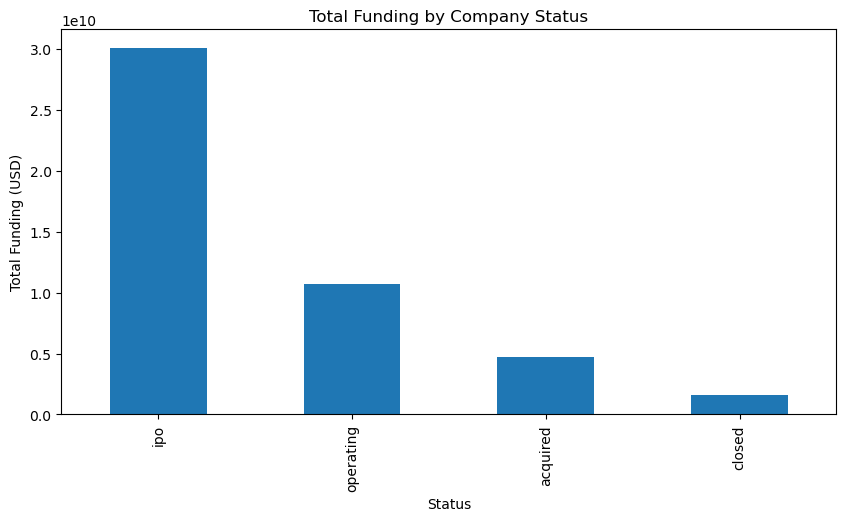

In [75]:
# Visualize funding distribution by company status as a bar chart
funding_by_status.plot(kind='bar', figsize=(10,5))
plt.title("Total Funding by Company Status")
plt.xlabel("Status")
plt.ylabel("Total Funding (USD)")
plt.show()

In [76]:
# Visualize top 20 countries by total funding to identify geographic investment concentration
funding_by_country.head(20).plot(kind='bar', figsize=(12,6))
plt.title("Top 20 Countries by Total Funding")
plt.xlabel("Country")
plt.ylabel("Total Funding (USD)")
plt.show()

NameError: name 'funding_by_country' is not defined

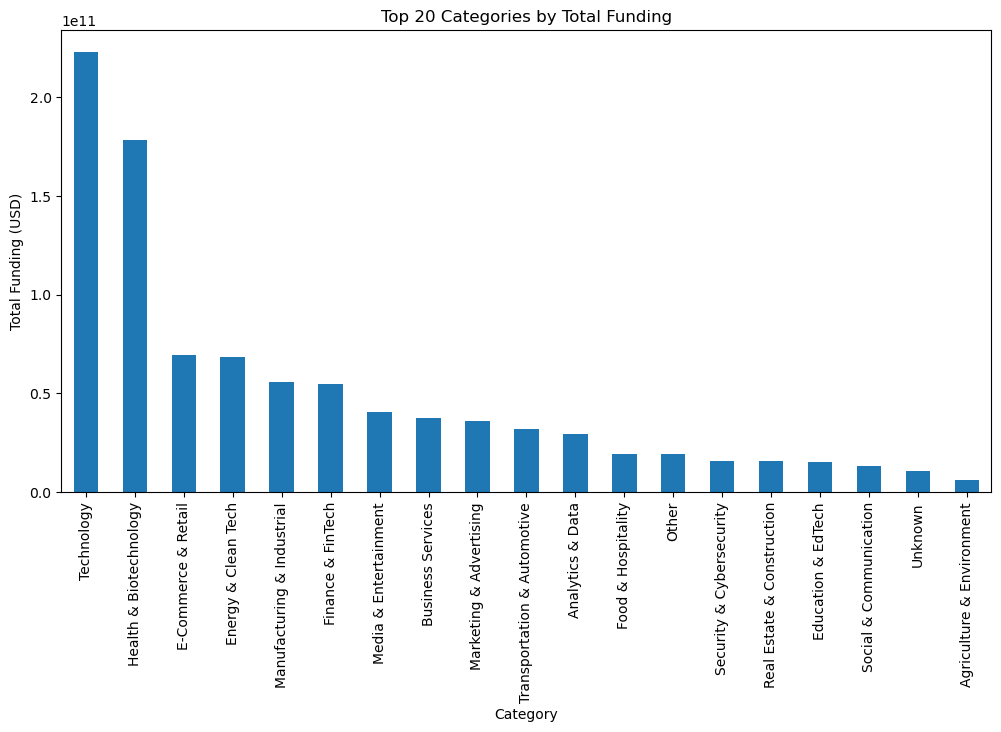

In [ ]:
funding_by_category.head(20).plot(kind='bar', figsize=(12,6))
plt.title("Top 20 Categories by Total Funding")
plt.xlabel("Category")
plt.ylabel("Total Funding (USD)")
plt.show()


In [ ]:
# Ensure both columns are numeric
df_clean['funding_rounds'] = pd.to_numeric(df_clean['funding_rounds'], errors='coerce')
df_clean['funding_total_usd'] = pd.to_numeric(df_clean['funding_total_usd'], errors='coerce')

# Group and aggregate
funding_by_rounds = (
    df_clean.groupby('funding_rounds')['funding_total_usd']
    .max()
    .sort_index()       # ordered by round count (0,1,2,…)
)

print(funding_by_rounds)

# Convert to DataFrame to avoid plotting issues
funding_by_rounds_df = funding_by_rounds.to_frame()

# Plot
funding_by_rounds_df.plot(kind='bar', figsize=(10,5))
plt.title("Total Funding (USD) by Number of Funding Rounds")
plt.xlabel("Number of Funding Rounds")
plt.ylabel("Total Funding (USD)")
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [ ]:
# 1. Define the imputation function
def hierarchical_fill(df, target_col, group_cols):
    return df[target_col].fillna(
        df.groupby(group_cols)[target_col].transform('median')
    )

# Ensure df_clean is an actual copy
df_clean = df_clean.copy()

# Tier 1
df_clean.loc[:, 'funding_total_usd'] = hierarchical_fill(
    df_clean, 'funding_total_usd',
    ['status', 'funding_rounds', 'category', 'country_code']
)

# Tier 2
df_clean.loc[:, 'funding_total_usd'] = hierarchical_fill(
    df_clean, 'funding_total_usd',
    ['status', 'funding_rounds', 'category']
)

# Tier 3
df_clean.loc[:, 'funding_total_usd'] = hierarchical_fill(
    df_clean, 'funding_total_usd',
    ['status', 'funding_rounds']
)

# Tier 4
df_clean.loc[:, 'funding_total_usd'] = hierarchical_fill(
    df_clean, 'funding_total_usd',
    ['status']
)

# Global fallback
global_median = df_clean['funding_total_usd'].median()
df_clean.loc[:, 'funding_total_usd'] = df_clean['funding_total_usd'].fillna(global_median)

# Check final
print("Remaining Nulls:", df_clean['funding_total_usd'].isna().sum())


Remaining Nulls: 0


In [ ]:
df_selected = df_clean[
    ['name', 'category', 'country_code', 'region', 'city',
     'status', 'funding_total_usd', 'funding_rounds',
     'founded_at', 'first_funding_at', 'last_funding_at']
].copy()   

In [ ]:
for col in ['founded_at', 'first_funding_at', 'last_funding_at']:
    df_selected [col] = pd.to_datetime(df_selected [col], errors='coerce').dt.normalize()

In [ ]:
df_selected.dtypes

name                         object
category                     object
country_code                 object
region                       object
city                         object
status                       object
funding_total_usd           float64
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object

In [ ]:
# Save to CSV
df_selected.to_csv('processed_startups_data.csv', index=False)

In [ ]:
# Filter rows where funding_rounds == 1
single_round = df_selected[df_selected['funding_rounds'] == 1]

# Check if first_funding_at equals last_funding_at
single_round_check = single_round['first_funding_at'] == single_round['last_funding_at']

# Show the rows where it's NOT equal (inconsistent)
inconsistent_rows = single_round[~single_round_check]

print("Rows where funding_rounds = 1 but first_funding_at != last_funding_at:")
print(inconsistent_rows)


Rows where funding_rounds = 1 but first_funding_at != last_funding_at:
Empty DataFrame
Columns: [name, category, country_code, region, city, status, funding_total_usd, funding_rounds, founded_at, first_funding_at, last_funding_at]
Index: []
